In [1]:
 # Installing google colab and p7zip. p7zip is for unziping files in google colab.
 !pip install -q kaggle
 !apt-get install p7zip-full
 !pip install py7zr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.6 MB/s eta 0:00:00


In [2]:
#Importing necessary libriareis like pandas and nupy
import pandas as pd
import py7zr
import os
import numpy as np
import shutil
import torch
import statistics
from random import sample
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import shutil
import warnings
import statistics
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import random
import torch
import torch.nn as nn
import torchvision.models as models


In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:

!mv kaggle.json ~/.kaggle/

In [7]:
!kaggle competitions download -c cifar-10

 97% 697M/715M [00:06<00:00, 124MB/s]
100% 715M/715M [00:06<00:00, 118MB/s]


In [8]:
! unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [9]:

with py7zr.SevenZipFile('/content/train.7z', mode='r') as z:
    z.extractall()

# with py7zr.SevenZipFile('/content/test.7z', mode='r') as z:
#     z.extractall()

In [10]:
labels=pd.read_csv("/content/trainLabels.csv")

In [11]:
labels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [12]:
unique_classes = labels['label'].unique()

# Print the unique classes
print(unique_classes)

['frog' 'truck' 'deer' 'automobile' 'bird' 'horse' 'ship' 'cat' 'dog'
 'airplane']


In [13]:

# Create the folders
for folder_name in unique_classes:
    folder_path = os.path.join('/content/dataset/train', folder_name)
    os.makedirs(folder_path, exist_ok=True)
    folder_path = os.path.join('/content/dataset/valid', folder_name)
    os.makedirs(folder_path, exist_ok=True)

In [14]:

dataset_dir = '/content/train'
parent_dir='/content/dataset/train'


#Loop through the DataFrame and move each image to the corresponding class folder
for pic in os.listdir(dataset_dir):
    id=name_without_extension = pic[:-4]
    label = labels[labels['id'] == int(id)]
    label=label = label['label'].values[0]
    destination=os.path.join(parent_dir,label)
    src=os.path.join(dataset_dir,pic)
    shutil.move(src,destination)


In [15]:
train_dir='/content/dataset/train'
valid_dir='/content/dataset/valid'

In [16]:


warnings.filterwarnings('ignore')

use_gpu = torch.cuda.is_available()
np.random.seed(1234)

In [17]:
for label in os.listdir(train_dir):
  len_class=len(os.listdir(os.path.join(train_dir,label)))
  number_of_valid=round(.05*len_class)
  print(number_of_valid)
  valid_data_per_class=sample(os.listdir(os.path.join(train_dir,label)), k=number_of_valid)
  for pic in valid_data_per_class:
      src=os.path.join(train_dir,label,pic)
      destination=os.path.join(valid_dir,label)
      shutil.move(src,destination)


250
250
250
250
250
250
250
250
250
250


In [18]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sz = 224
batch_size = 32


In [19]:
tfms = transforms.Compose([
    transforms.Resize((sz//2, sz//2)),  # Resize the images to half the size
    transforms.ToTensor(),        # Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [20]:
train_ds = datasets.ImageFolder(train_dir,tfms)
valid_ds = datasets.ImageFolder(valid_dir,tfms)




In [21]:
train_dl = torch.utils.data.DataLoader(train_ds,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=8)
val_dl = torch.utils.data.DataLoader(valid_ds,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=8)


In [22]:


# Load the pre-trained WideResNet model
model = models.wide_resnet50_2(pretrained=True)

# Remove the last layer from the model
model = nn.Sequential(*list(model.children())[:-1])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the model to evaluation mode
model.eval()

model.to(device)





Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:01<00:00, 82.2MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [23]:
    # Extract features from the model for the training set
train_features = []
train_labels = []
train_dl = torch.utils.data.DataLoader(train_ds,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=8)

for batch_idx, (data, target) in enumerate(train_dl):
        data = data.to(device)
        with torch.no_grad():
            feature = model(data)
        train_features.append(feature.cpu().numpy())
        train_labels.append(target.numpy())

train_features = np.concatenate(train_features, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

In [24]:
valid_features = []
valid_labels = []
valid_dl = torch.utils.data.DataLoader(valid_ds,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=8)

for batch_idx, (data, target) in enumerate(valid_dl):
        data = data.to(device)
        with torch.no_grad():
            feature = model(data)
        valid_features.append(feature.cpu().numpy())
        valid_labels.append(target.numpy())

valid_features = np.concatenate(valid_features, axis=0)
valid_labels = np.concatenate(valid_labels, axis=0)

In [25]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 32)
        self.fc3 = nn.Linear(32, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        x = self.sigmoid(x)

        return x


In [26]:


def evaluate_model(model, features, labels, device):
    model.eval()
    val_loss = 0.0
    corrects = 0
    total_samples = 0

    # Move the model and criterion to the GPU device
    model.to(device)

    with torch.no_grad():
        for i in range(0, len(features), batch_size):
            inputs = torch.from_numpy(features[i:i+batch_size]).float().to(device)
            labels_inputs = labels[i:i+batch_size]
            labels_inputs = torch.tensor(labels_inputs).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels_inputs)

            _, preds = torch.max(outputs, 1)
            corrects += (preds == labels_inputs).sum().item()
            total_samples += labels_inputs.size(0)

    accuracy = 100.0 * corrects / total_samples
    return accuracy

In [27]:


def compute_proj(W):
  # Calculate W transpose
  WT = W.t()

  # Compute W * W.t()
  WWt = torch.matmul(W, WT)

  # Calculate the inverse of WWt
  inverse_WWt = torch.inverse(WWt)

  # Compute the expression W.t() * inverse(W * W.t()) * W
  result = torch.matmul(torch.matmul(WT, inverse_WWt), W)


  return result


In [28]:
def hook(module, input, output):
    setattr(module, 'input_tensor', input[0])
    input_copy = input[0].clone()
    output_copy = output.clone()

In [29]:
def setatr(model):
  for name, module in model.named_modules():
      if isinstance(module, torch.nn.Linear):
          module.register_forward_hook(hook)

In [42]:

# Define the original list of classes
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define a list to store the results
Acc_without = []
# Loop through the different combinations of class groupings
for i in range(2, 10):
    # Define the two arrays to hold the classes
    known_classes = []
    outlier_classes = []

    # Randomly assign classes to the two arrays
    for j in range(i):
        known_classes.append(classes[j])
    for j in range(i, 10):
        outlier_classes.append(classes[j])

    # Create a boolean mask to select the relevant samples
    mask = np.isin(train_labels, known_classes)

    # Select the relevant samples from the train_features and train_labels arrays
    known_data = train_features[mask]
    known_labels = train_labels[mask]

    mask = np.isin(valid_labels, known_classes)

    # Select the relevant samples from the valid_features and valid_labels arrays
    known_data_valid = valid_features[mask]
    known_labels_valid = valid_labels[mask]


    # Train the network
    input_dim = known_data.shape[1]
    hidden_dim = 64
    output_dim = len(known_classes)
    lr = 1e-2
    num_epochs = 10
    batch_size = 128
    net = Net(input_dim, hidden_dim, output_dim)

    # Move the model and criterion to the GPU device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net.to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adam(net.parameters(), lr=lr)
    losses = []

    for epoch in range(num_epochs):
        # Train the network
        net.train()
        num_batches = 0

        for i in range(0, len(known_data), batch_size):
            inputs = torch.from_numpy(known_data[i:i+batch_size]).float().to(device)
            labels = torch.from_numpy(known_labels[i:i+batch_size]).long().to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            losses.append(loss)
            loss.backward()
            optimizer.step()
            num_batches += 1

    acc_without = evaluate_model(net, known_data_valid, known_labels_valid, device)
    Acc_without.append(acc_without)
    print(Acc_without)

[97.6]
[97.6, 95.46666666666667]
[97.6, 95.46666666666667, 93.8]
[97.6, 95.46666666666667, 93.8, 92.08]
[97.6, 95.46666666666667, 93.8, 92.08, 88.86666666666666]
[97.6, 95.46666666666667, 93.8, 92.08, 88.86666666666666, 86.34285714285714]
[97.6, 95.46666666666667, 93.8, 92.08, 88.86666666666666, 86.34285714285714, 84.65]
[97.6, 95.46666666666667, 93.8, 92.08, 88.86666666666666, 86.34285714285714, 84.65, 84.22222222222223]


In [43]:


# Define the original list of classes
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Define a list to store the results
Acc_with = []
# Loop through the different combinations of class groupings
for i in range(2, 10):
    # Define the two arrays to hold the classes
    known_classes = []
    outlier_classes = []

    # Randomly assign classes to the two arrays
    for j in range(i):
        known_classes.append(classes[j])
    for j in range(i, 10):
        outlier_classes.append(classes[j])




    # Create a boolean mask to select the relevant samples
    mask = np.isin(train_labels, known_classes)

    # Select the relevant samples from the train_features and train_labels arrays

    known_data = train_features[mask]
    known_labels = train_labels[mask]


    mask = np.isin(valid_labels, known_classes)

    # Select the relevant samples from the valid_features and valid_labels arrays

    known_data_valid = valid_features[mask]
    known_labels_valid = valid_labels[mask]


    # Train the network
    input_dim = known_data.shape[1]
    hidden_dim = 64
    output_dim = len(known_classes)
    lr = 1e-2
    num_epochs = 10
    batch_size = 128

    net1 = Net(input_dim, hidden_dim, output_dim)
    setatr(net1)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net1.parameters(), lr=lr)
    L = 0.1
    losses = []

    # Move the model and criterion to the GPU device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net1.to(device)
    criterion.to(device)

    for epoch in range(num_epochs):
      print("Epoch is {}".format(epoch))
      # Train the network
      net1.train()
      nusa_loss = 0.0
      num_batches = 0

      for i in range(0, len(known_data), batch_size):
          inputs = torch.from_numpy(known_data[i:i+batch_size]).float().to(device)
          labels = torch.from_numpy(known_labels[i:i+batch_size]).long().to(device)
          optimizer.zero_grad()
          outputs = net1(inputs)
          arr=[]
          # Compute nusa_loss for this batch
          for name, module in net1.named_modules():
              if isinstance(module, torch.nn.Linear):
                  with torch.no_grad():
                      xl = torch.tensor(module.input_tensor.tolist(), device=device)
                      P = compute_proj(module.weight).to(device)
                      projection = P.matmul(xl.t())
                      norm_projection = torch.norm(projection)
                      norm_xl = torch.norm(xl)
                      nusa_loss = norm_projection / norm_xl
                      arr.append(nusa_loss)

          # Compute the total loss for this batch

          loss = criterion(outputs, labels) + L * torch.tensor(arr).to(device).mean()

          nusa_loss = 0.0
          losses.append(loss)
          loss.backward()
          optimizer.step()
          num_batches += 1
    acc_with =  evaluate_model(net1,known_data_valid,known_labels_valid,device)
    Acc_with.append(acc_with)
    print(Acc_with)


Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0]
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0, 95.73333333333333]
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0, 95.73333333333333, 93.4]
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0, 95.73333333333333, 93.4, 91.68]
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0, 95.73333333333333, 93.4, 91.68, 88.4]
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0, 95.73333333333333, 93.4, 91.68, 88.4, 86.17142857142858]
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
[97.0, 95.7333333

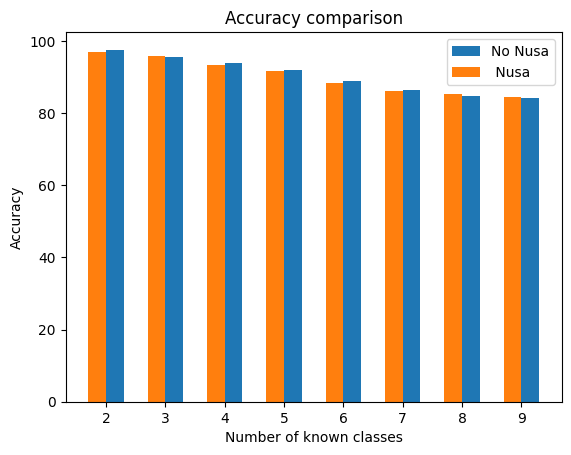

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of known classes
num_known_classes = np.arange(2, 10)

# Define the width of each bar
bar_width = 0.3

# Plot the accuracy without Nusa
plt.bar(num_known_classes + bar_width/2, Acc_without, width=bar_width, label='No Nusa')


# Plot the accuracy with Nusa
plt.bar(num_known_classes - bar_width/2, Acc_with, width=bar_width, label=' Nusa')



# Add axis labels and title
plt.xlabel('Number of known classes')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [94]:

known_classes = [0,1,2,3,4]
outlier_classes = [5,6,7,8,9]



mask = np.isin(train_labels, known_classes)
print(mask)

# Select the relevant samples from the train_features and train_labels arrays

known_data = train_features[mask]
known_labels = train_labels[mask]
print(known_labels)


mask = np.isin(valid_labels, known_classes)

# Select the relevant samples from the valid_features and valid_labels arrays

known_data_valid = valid_features[mask]
known_labels_valid = valid_labels[mask]





outlier_indicators = []
outlier_class_labels = []



[False False  True ...  True False False]
[3 3 2 ... 2 2 4]


In [139]:
# Train the network
input_dim = known_data.shape[1]
hidden_dim = 64
output_dim = len(known_classes)
lr = 1e-2
batch_size=128
num_epochs=100

net1 = Net(input_dim, hidden_dim, output_dim)
setatr(net1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net1.parameters(), lr=lr)

train_losses = []
val_losses = []

losses = []
nusa=[]



In [140]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net1.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net1.parameters(), lr=lr)
L = 0.1

for epoch in range(num_epochs):
    print("Epoch is {}".format(epoch))
    # Train the network
    net1.train()
    nusa_loss = 0.0
    num_batches = 0


    for i in range(0, len(known_data), batch_size):
        inputs = torch.from_numpy(known_data[i:i+batch_size]).float().to(device)
        labels = torch.from_numpy(known_labels[i:i+batch_size]).long().to(device)
        optimizer.zero_grad()
        outputs = net1(inputs)
        arr=[]
        # Compute nusa_loss for this batch
        for name, module in net1.named_modules():
            if isinstance(module, torch.nn.Linear):
                with torch.no_grad():
                    xl = module.input_tensor.to(device)
                    P = compute_proj(module.weight.to(device))
                    projection = P.matmul(xl.t())
                    norm_projection = torch.norm(projection)
                    norm_xl = torch.norm(xl)
                    nusa_loss = norm_projection / norm_xl
                    arr.append(nusa_loss)

        # Compute the total loss for this batch
        loss = criterion(outputs, labels) + L * torch.tensor(arr).to(device).mean()
        arr=[]
        loss.backward()
        optimizer.step()
        num_batches += 1


Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
Epoch is 10
Epoch is 11
Epoch is 12
Epoch is 13
Epoch is 14
Epoch is 15
Epoch is 16
Epoch is 17
Epoch is 18
Epoch is 19
Epoch is 20
Epoch is 21
Epoch is 22
Epoch is 23
Epoch is 24
Epoch is 25
Epoch is 26
Epoch is 27
Epoch is 28
Epoch is 29
Epoch is 30
Epoch is 31
Epoch is 32
Epoch is 33
Epoch is 34
Epoch is 35
Epoch is 36
Epoch is 37
Epoch is 38
Epoch is 39
Epoch is 40
Epoch is 41
Epoch is 42
Epoch is 43
Epoch is 44
Epoch is 45
Epoch is 46
Epoch is 47
Epoch is 48
Epoch is 49
Epoch is 50
Epoch is 51
Epoch is 52
Epoch is 53
Epoch is 54
Epoch is 55
Epoch is 56
Epoch is 57
Epoch is 58
Epoch is 59
Epoch is 60
Epoch is 61
Epoch is 62
Epoch is 63
Epoch is 64
Epoch is 65
Epoch is 66
Epoch is 67
Epoch is 68
Epoch is 69
Epoch is 70
Epoch is 71
Epoch is 72
Epoch is 73
Epoch is 74
Epoch is 75
Epoch is 76
Epoch is 77
Epoch is 78
Epoch is 79
Epoch is 80
Epoch is 81
Epoch is 82
Epoch is 83
Ep

In [141]:
evaluate_model(net1,known_data_valid,known_labels_valid,device)

92.4

In [165]:
array=[]
array1=[]
threshold=.8
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check if GPU is available

with torch.no_grad():
  for i in range(len(valid_features)):
    nusa = 0.0
    sample = valid_features[i]
    label = valid_labels[i]

    # Forward pass through the network
    inputs = torch.from_numpy(sample).unsqueeze(0).float().to(device)  # Move data to GPU
    net1.to(device)  # Move model to GPU
    outputs = net1(inputs)

    # Compute NuSA for the sample
    arr=[]
    for index,(name, module) in enumerate(net1.named_modules()):

                if isinstance(module, torch.nn.Linear):
                  with torch.no_grad():
                    xl = torch.tensor(module.input_tensor.tolist()).to(device)  # Move data to GPU
                    P = compute_proj(module.weight)
                    P=torch.matmul(P.t(),P)
                    projection = torch.matmul(P,xl.t())
                    norm_projection = torch.norm(projection)

                    norm_xl = torch.norm(xl)
                    nusa = norm_projection/norm_xl
                    arr.append(nusa)
    arr=[]
    if( label  in known_classes):
      array.append(nusa)
    else:
      array1.append(nusa)

    # Check if the sample is an outlier based on NuSA and threshold
    if nusa > threshold:
        _, predicted_label = torch.max(outputs, 1)
        outlier_indicators.append(0)  # Non-outlier
        outlier_class_labels.append(predicted_label.item())
    else:
        outlier_indicators.append(1)  # Outlier
        outlier_class_labels.append(None)


In [168]:
print("NuSa for non-outliers", torch.tensor(array).to(device).mean().item())
print("NuSa for outliers", torch.tensor(array1).to(device).mean().item())

NuSa for non-outliers 0.8002946376800537
NuSa for outliers 0.7743954062461853
